# NLP INTRODUCTION PART: 2

## En este punto continuaremos con un ejemplo de aplicación del Método TF-IDF que se explicó en el punto pasado.

Se usará el siguiente [dataset](https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset) para la siguiente practica en donde se hará un recomendador de peliculas.

In [ ]:
#Importamos pandas y leemos el csv
import pandas as pd 

df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [2]:
df['genres'] = df['genres'].str.replace('|', ' ')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [3]:
df['plot_keywords'] = df['plot_keywords'].str.replace('|', ' ')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action Adventure Fantasy Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action Adventure Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action Adventure Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df['texto'] = df[['genres', 'plot_keywords']].apply(lambda row: ' '.join(row.values.astype(str)),axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [6]:
row = df[['genres','plot_keywords','texto']].iloc[0]
print(row)

genres                             Action Adventure Fantasy Sci-Fi
plot_keywords               avatar future marine native paraplegic
texto            Action Adventure Fantasy Sci-Fi avatar future ...
Name: 0, dtype: object


In [7]:
#importamos las librerias que ocuparemos.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

Nota: En el siguiente punto se colocaron 2000 en la variable max_features, esto se refiere al maximo que nosotros le estamos poniendo a la función más es muy probable que si quiera alcance los 2000 ya que recordemos que los tokens son palabras o caracteres unicos en los textos por lo que se llegan a ignorar los que se repiten.

In [ ]:
tfidf = TfidfVectorizer(max_features=2000)

In [9]:
X = tfidf.fit_transform(df['texto'])
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 43997 stored elements and shape (5043, 2000)>

In [13]:
#mapeo de peliculas y limpieza
peliculas = pd.Series(df.index, index=df['movie_title'])
peliculas.index = peliculas.index.str.strip()
peliculas.head()

movie_title
Avatar                                        0
Pirates of the Caribbean: At World's End      1
Spectre                                       2
The Dark Knight Rises                         3
Star Wars: Episode VII - The Force Awakens    4
dtype: int64

In [15]:
indice = peliculas['Avatar']
print(indice)

0


In [19]:
consulta = X[indice]
print(consulta)
print(consulta.toarray())

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (1, 2000)>
  Coords	Values
  (0, 34)	0.18454616338200297
  (0, 44)	0.20147225203094668
  (0, 636)	0.23175872595803823
  (0, 1554)	0.23163756512772668
  (0, 653)	0.23163756512772668
  (0, 718)	0.4164065793214277
  (0, 1071)	0.5199567176285965
  (0, 1176)	0.566196244705834
[[0. 0. 0. ... 0. 0. 0.]]


In [23]:
similitud = cosine_similarity(consulta, X)
print(similitud)

[[1.         0.10112454 0.06949699 ... 0.         0.         0.        ]]


¿Qué significa esa salida? R: Esa matriz es la similitud que tiene la pelicula con los de la lista de titulos, por ejemplo, nosotros elegimos la pelicula "Avatar", y como se ve en el array el primer valor es un "1", eso quiere decir que dicha pelicula tiene mucha similitud con "Avatar" (claro porque es la misma). Veamos más ejemplos

In [24]:
similitud = similitud.flatten()

In [ ]:
similitud[3] #Avatar y The Dark Knight Rises  tienen una similitud del 2%

np.float64(0.02767797617392109)

In [ ]:
similitud[4] #Avatar y Star Wars: Episode VII - The Force Awakens tienen una similitud del 0%

np.float64(0.0)

In [ ]:
similitud[1] #Avatar y Pirates of the Caribbean: At World's End  tienen una similitud del 10%

np.float64(0.10112453992495118)

Para ver de una forma más visual estas similitudes vamos a graficarlos

In [30]:
#importamos matplotlib
import matplotlib.pyplot as plt

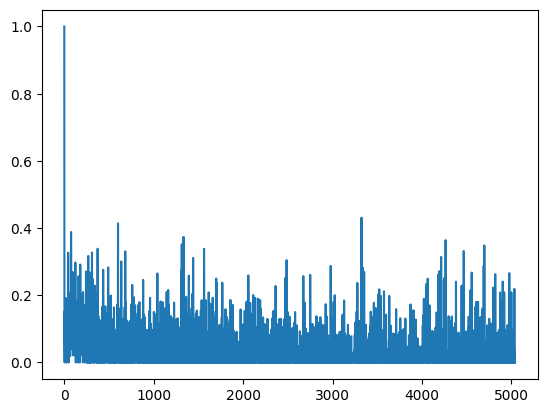

In [31]:
plt.plot(similitud)

Como se puede observar en la grafica, vemos que el primero de la lista tiene una similitud del 100%, esto por ser la misma pelicula pero podemos encontrar muchas peliculas que sobrepasan la similitud del 40%. Pero, ¿Cuales peliculas son las más similares?

In [34]:
(-similitud).argsort()

array([   0, 3324,  601, ..., 5013, 5011,   26], shape=(5043,))

In [45]:
recomendacion = (-similitud).argsort()[1:11]
df['movie_title'].iloc[recomendacion]

3324    Ultramarines: A Warhammer 40,000 Movie 
601                         Battle Los Angeles 
76                                  Waterworld 
1334                                  Serenity 
4264                             Smoke Signals 
1314                                  Sunshine 
4697                          Naturally Native 
373               A.I. Artificial Intelligence 
1563                                  Repo Men 
4467       Space: Above and Beyond             
Name: movie_title, dtype: object

Si ustedes quieren probar con otra pelicula simplemente regresen al Code Cell #15, cambian el nombre de la pelicula y vuelven a ejecutar todas las demás celdas por debajo de la 15 hasta la 45.

## Neuronal Word Embeddings

¿Recuerdan el post anterior donde se hablabá de similitud de vectores donde las palabras se convertian en vectores?
Bueno aquí es cuando tocamos más a fondo el tema.
Aquí es donde cada cadena se convierte en un vector. Por ejemplo:
```sql
palabras = {'gato':[0.1,0.9],
            'perro':[0.15,0.85]}
```

Recordemos que la vectorización de palabras es para poder medir la distancia entre una palabra y otras para que el modelo pueda comprender mejor las relaciones.

En el ejemplo dado podemos observar que tal cual 'gato' y 'perro' no son iguales pero estan muy cercas, quizás por la relación "mascota", "mamifero",etc.




### Métodos de vectorización

- Conversión de documentos en vectores ("Bolsa de palabras", "TF-IDF")
- Palabras a vectores
- Embeddings (Descripción de la representación de documentos similares mediante una secuencia de vectores)

### Modelos de secuencias en aprendizaje profundo

- Modelos construidos para secuencias 
    - CNN: Usualmente usada en vision computarizada (Detección y clasificación de imagenes), o clasificación de texto.
    - RNN: Muy usado en el traducción de idiomás donde tiene mucho peso el orden de las palabras en una sentencia.
    - Transformers: Usado por GPT4, BERT; Este mantiene el contexto global del texto.
- Relevancia del orden de las palabras en una sentencia.
- Aplicación en traducciones de idiomas, respuestas a preguntas, chatbots, etc.

### Word Embeddings

El word embedding convierte una palabra en un vector, ¿Esto que nos permite hacer/lograr? Al convertir o representar las palabras en vectores nos permitirá no solo capturar la relación entre las mismas, sino que tambien su significado o contexto.

Las tecnicas más populares para lograr esto son:
- Word2Vec: Usa redes neuronales usando CBOW y Skip-Gram.
- GloVe: Diseñado para capturar la información semantica y sintactica de la palabra basandose en la "matriz de concurrencia de la palabra"

### Problematica que soluciona Word Embeddings

Imaginemos que tenemos las siguientes palabras:
- Alemania
- España
- Madrid
- Berlín

Mientras que otros métodos de vectorización, como Bag of Words o TF-IDF, solo indican la frecuencia o importancia de una palabra dentro de un conjunto de documentos, los word embeddings son capaces de capturar relaciones semánticas y analogías entre palabras mediante incrustaciones en un espacio vectorial.

Por ejemplo, supongamos que obtenemos los siguientes vectores:

```python
palabras = {
    'Alemania':[0.5, 1.0],
    'España':[0.5, 0.5],
    'Madrid':[1.0, 1.0],
    'Berlín':[1.0, 1.5]
}
```
Podemos observar que Alemania y España están cerca entre sí, al igual que Madrid y Berlín. Esto sugiere que el modelo ha aprendido que Alemania y España son países, y que Madrid y Berlín son ciudades.

Además, los embeddings pueden capturar relaciones más profundas, como:

- Berlín - Alemania + España ≈ Madrid

Es decir, el modelo entiende que la relación entre país y su capital se mantiene de forma similar en el espacio vectorial.

Esa capacidad de representar similitudes y analogías entre palabras es lo que hace tan potentes a los word embeddings.

## Parte practica de Word Embeddings

### Similitud

El punto de esta practica es crear una función en el cual se manden 3 palabras (Rey, Hombre, Mujer) y el modelo debe de predecir la 4 palabra que debe ser Reina

In [ ]:
#Instalación de librerias necesarias
%pip install gensim -q

In [ ]:
#importamos la libreria
import gensim

Para esta parte se usará el siguiente [dataset](https://www.kaggle.com/datasets/rtatman/pretrained-word-vectors-for-spanish) (por cuestiones de almacenamiento en git, este documento no se agregará al repositorio pero podran descargarlo por ustedes mismos desde el link.)

In [49]:
vectores = gensim.models.KeyedVectors.load_word2vec_format('SBW-vectors-300-min5.txt')

In [50]:
#Explicación
'''
Cómo se mencionó anteriormente, el modelo debe de predecir la cuarta palabra. Aqui tenemos 2 variables:
- Positive
- Negative
El polo positivo, la relación que se tiene con el negativo es que el v1 = v2 (Rey es Hombre), v3 es Mujer, por
lo que queremos es que encuentre la palabra Reina.
'''
def analogia(v1,v2,v3):
    similitud = vectores.most_similar(positive=[v1,v3],negative=[v2])
    print(f"{v1} es a {v2}, como {similitud[0][0]} es a {v3}")

In [51]:
analogia('rey','hombre','mujer')

rey es a hombre, como reina es a mujer


Cómo se puede observar, el modelo logró predecir la palabra. Ahora hagamos más pruebas.

In [57]:
analogia('pan','trigo','leche')

pan es a trigo, como yogur es a leche


In [58]:
analogia('alemania','alemán','español')

alemania es a alemán, como España es a español


In [60]:
#uno más dificil
analogia('platano','potasio','zinc')

platano es a potasio, como yautía es a zinc


Nota: Al realizar algunos experimientos con ciertas analogias (ejemplo: 'México','Guatemala','Canadá') donde me arroja resultados erroneos. Esto puede ser por como es que se entrenó el modelo, pero por si acaso veamos las palabras cercanas de ciertas palabras.

In [66]:
def cercanos(v):
    vecinos = vectores.most_similar(positive=[v])
    print("vecinos de la palabra: %s" % v)
    for word, score in vecinos:
        print("\t%s" % word)

In [67]:
cercanos('Canadá')

vecinos de la palabra: Canadá
	Quebec
	Australia
	Ontario
	Estados
	canadienses
	Calgary
	Unido
	Unidos
	Cánada
	Alberta


In [68]:
cercanos('México')

vecinos de la palabra: México
	Ciudad
	mexicana
	Toluca
	Querétaro
	mexicano
	mexicanos
	Veracruz
	Oaxaca
	Guanajuato
	Chiapas


In [69]:
cercanos('taco')

vecinos de la palabra: taco
	tacos
	espiche
	palillo
	taquito
	cachetear
	placero
	palo
	virote
	picadita
	capellada


### Nuestro propio Embedding con Word2Vec

Recordemos un poco lo que es Word2Vec.

Word2Vec es un modelo que se utiliza para aprender representaciones vectoriales de palabras. Estas representaciones
pueden capturar muchas propiedades lingüisticas de las palabras, como su significado semantico, gramatical y contextual.

In [ ]:
#Instalación de librerias
%pip install pymupdf -q

In [ ]:
#importación de librerias
import string
from gensim.models import Word2Vec
import pymupdf

In [72]:
#cargar el documento
with open('texto_test.txt', 'r', encoding='utf-8') as file:
    documento = file.read()

In [ ]:
#en caso de que sea un pdf será así
def extraer_texto_pdf(ruta_archivo):
    doc = pymupdf.open(ruta_archivo)
    text = ""
    for page in doc:
        text += page.get_text()
    return text 

documento = extraer_texto_pdf('Models.pdf')



In [73]:
#vemos el texto
documento

'Alan Turing\n(Alan Mathison Turing; Londres, 1912 - Wilmslow, Reino Unido, 1954) Matemático británico. Pasó sus primeros trece años en la India, donde su padre trabajaba en la Administración colonial. De regreso al Reino Unido, estudió en el King\'s College y, tras su graduación, se trasladó a la Universidad estadounidense de Princeton, donde trabajó con el lógico Alonzo Church.\nEn 1937 publicó un célebre artículo en el que definió una máquina calculadora de capacidad infinita (máquina de Turing) que operaba basándose en una serie de instrucciones lógicas, sentando así las bases del concepto moderno de algoritmo. Turing describió en términos matemáticos precisos cómo un sistema automático con reglas extremadamente simples podía efectuar toda clase de operaciones matemáticas expresadas en un lenguaje formal determinado. La máquina de Turing era tanto un ejemplo de su teoría de computación como una prueba de que un cierto tipo de máquina computadora podía ser construida.\n\nLa Segunda 

In [74]:
len(documento)

9384

En este caso el documento tiene 9384 caracteres, si es posible hagan un documento más extenso para tener más caracteres pero por cuestiones de este ejemplo continuaremos con este.

El siguiente paso es **Procesamiento de datos**

El objetivo es convertir el documento en una lista de frases, y cada frase en una lista de palabras, eliminando signos de puntuación y convirtiendo todo en minusculas.

In [78]:
#dividir el texto en frases usando algun signo como separador.
oraciones = documento.split('.')
len(oraciones)

61

In [81]:
#veamos la primera oración que nos da
oraciones[0]

'Alan Turing\n(Alan Mathison Turing; Londres, 1912 - Wilmslow, Reino Unido, 1954) Matemático británico'

In [86]:
#limpieza
oraciones_limpias = []
for oracion in oraciones:
    #eliminar puntuaciones y dividir por espacios
    tokens = oracion.translate(str.maketrans('','',string.punctuation)).split()

    #convertir a minusculas
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    #añadir solo si hay tokens
    if tokens:
        oraciones_limpias.append(tokens)
print(oraciones_limpias)

[['alan', 'turing', 'alan', 'mathison', 'turing', 'londres', 'wilmslow', 'reino', 'unido', 'matemático', 'británico'], ['pasó', 'sus', 'primeros', 'trece', 'años', 'en', 'la', 'india', 'donde', 'su', 'padre', 'trabajaba', 'en', 'la', 'administración', 'colonial'], ['de', 'regreso', 'al', 'reino', 'unido', 'estudió', 'en', 'el', 'kings', 'college', 'y', 'tras', 'su', 'graduación', 'se', 'trasladó', 'a', 'la', 'universidad', 'estadounidense', 'de', 'princeton', 'donde', 'trabajó', 'con', 'el', 'lógico', 'alonzo', 'church'], ['en', 'publicó', 'un', 'célebre', 'artículo', 'en', 'el', 'que', 'definió', 'una', 'máquina', 'calculadora', 'de', 'capacidad', 'infinita', 'máquina', 'de', 'turing', 'que', 'operaba', 'basándose', 'en', 'una', 'serie', 'de', 'instrucciones', 'lógicas', 'sentando', 'así', 'las', 'bases', 'del', 'concepto', 'moderno', 'de', 'algoritmo'], ['turing', 'describió', 'en', 'términos', 'matemáticos', 'precisos', 'cómo', 'un', 'sistema', 'automático', 'con', 'reglas', 'extrem

**Entrenamiento del modelo Word2Vec**

In [88]:
'''
Explicación:
- Sentences = las oraciones que usará el modelo para su entrenamiento.
- vector_size = Es el tamaño que tendrá nuestro embedding.
- window = Desde cuantas palabras debe tomar el modelo para el contexto
    (Ejemplo: digamos que tengamos el siguiente texto:
    
    'Word2Vec es un modelo que **se** utiliza para aprender representaciones vectoriales de palabras.'

    (tomaremos "se" como nuestra palabra de ejemplo)
    Como tenemos window como 5 entonces el modelo tomará 5 palabras antes y 5 palabras despues de dicha palabra para su 
    contexto.
    )
- min_count = Cantidad de veces que una palabra debe de repetirse para que el modelo lo tome en consideración.
- workers = Cuantos nucleos trabajen a la vez. Cómo mi PC tiene solamente 4 nulceos, solo le pondré 2.
'''
model = Word2Vec(sentences=oraciones_limpias, vector_size=500, window=5, min_count=1, workers=2)


In [ ]:
#veamos el vector de alguna palabra del texto
vector = model.wv['turing']
vector

array([ 3.47347028e-04,  7.34421075e-04,  5.45657473e-04,  1.91097148e-03,
       -1.14477566e-03, -3.88550980e-04,  1.24524871e-03,  1.09907787e-03,
        9.28723894e-04,  8.55854596e-04, -3.67195986e-04, -1.62049395e-03,
        5.01945557e-04, -1.70184870e-03, -4.58142080e-04, -2.31103203e-03,
       -4.60552721e-04, -1.87706784e-03,  1.52443908e-03, -1.27014157e-03,
        1.88689632e-03, -1.89683132e-03, -7.14212249e-04,  3.46937595e-04,
       -5.28029283e-04,  6.33848540e-04, -6.91117719e-04, -1.53035769e-04,
       -1.66848605e-03, -1.93739461e-03,  1.38424593e-03,  5.76823732e-05,
        1.18388620e-03, -1.57131720e-03,  7.81230396e-04, -1.77706406e-03,
        1.70443300e-03,  9.19384824e-04, -1.36976142e-03,  1.15356455e-03,
       -1.24572252e-03, -1.81998056e-03, -2.25714830e-04,  6.78850280e-04,
       -1.87789148e-03, -2.14835489e-03,  1.49592140e-03,  4.12870897e-04,
        9.04821500e-05,  5.17976121e-04, -8.27674288e-04,  3.37997713e-04,
        2.34824329e-04,  

In [ ]:
palabras_cercanas = model.wv.most_similar("turing", topn=10)
palabras_cercanas

[('inteligencia', 0.16513270139694214),
 ('que', 0.16042950749397278),
 ('con', 0.14856107532978058),
 ('inversa', 0.13980995118618011),
 ('encuestado', 0.1364438235759735),
 ('una', 0.13562528789043427),
 ('respuestas', 0.1329558938741684),
 ('actual', 0.13223935663700104),
 ('de', 0.13075046241283417),
 ('fue', 0.12661340832710266)]

In [92]:
palabras_cercanas = model.wv.most_similar("inteligencia", topn=10)
palabras_cercanas

[('operado', 0.17433081567287445),
 ('personas', 0.16796386241912842),
 ('turing', 0.16513271629810333),
 ('paso', 0.14612695574760437),
 ('lovelace', 0.14592580497264862),
 ('pasado', 0.13158577680587769),
 ('mapeamos', 0.13051386177539825),
 ('mensajes', 0.12683376669883728),
 ('donde', 0.12481240928173065),
 ('a', 0.12445157021284103)]

In [ ]:
#Código para guardar el modelo
model.save("modelo_word2vec.model")

In [ ]:
#Código para cargar modelo
modelo_cargado = Word2Vec.load("modelo_word2vec.model")

In [ ]:
#Exportar Embeddings
#si lo queremos como texto
model.wv.save_word2vec_format('embedding.txt', binnary=False)
#si lo queremos como bin
model.wv.save_word2vec_format('embedding.bin', binnary=True)

In [ ]:
#cargar algun embedding
from gensim.models import KeyedVectors
#Si es texto 
embeddings_cargados = KeyedVectors.load_word2vec_format('embedding.txt', binnary= False)
#Si es bin
embeddings_cargados = KeyedVectors.load_word2vec_format('embedding.bin', binnary= True)

embeddings_cargados


Digamos que queremos cargar un conjunto de PDF's, entonces haríamos lo siguiente:
NOTA: En este caso solo se colocará el código que se puede usar ya que para estos ejemplos no puedo proporcionar pdf que puedan usar de ejemplo.

In [ ]:
#instalamos la siguiente libreria solo para la ayuda visual
%pip install tqdm -q

In [ ]:
#importación de librerias
import os
import pymupdf
from tqdm import tqdm

In [ ]:
def extraer_texto_pdf(ruta_archivo):
    doc = pymupdf.open(ruta_archivo)
    text = ""
    for page in doc:
        text += page.get_text()
    return text 

In [ ]:
ruta_carpeta = ""
todos_los_textos = []

for archivo in tqdm(os.listdir(ruta_carpeta)):
    if archivo.endswith('.pdf'):
        ruta_completa = os.path.join(ruta_carpeta, archivo)
        try:
            documento = extraer_texto_pdf(ruta_completa)
            todos_los_textos.append(documento)
        except Exception as e:
            print(f"Error al procesar {archivo}: {e}")

In [ ]:
oraciones_totales = []
long = 0

for documento in todos_los_textos:
    long = long + len(documento)
    oraciones = documento.split('.') # o ','
    oraciones_totales.extend(oraciones)

print(f"Número de caracteres: {long}")

Ya apartir de este punto solo vuelven a hacer limpieza, entrenamiento y testean con palabras como se vio en puntos anteriores.